In [285]:
from scipy.stats import ttest_ind
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [286]:
# define functions

def convert_2_bool(df, col_list):
    for column in col_list:
        df[column] = df[column].map(dict(yes=1, no=0))
    return df


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df_stud, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_barplot(y_axis, df_melt, title):
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.barplot(x='cols', y=y_axis, data=df_melt, hue='vals')
    plt.xticks(rotation=45, size=15)
    plt.yticks(size=15)
    plt.ylim(0, 100)
    ax.set_title(title)
    plt.show()


def get_stat_dif(column):
    cols = df_stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df_stud.loc[df_stud.loc[:, column] == comb[0], 'score'],
                     df_stud.loc[df_stud.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

### 1. Primary Data Analysis

In [287]:
df_stud = pd.read_csv('stud_math.csv')

display(df_stud.head(5))
df_stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

The data set consists of 395 rows and 30 columns, where 13 columns are numeric and are 17 categorical.

Firstly, Let's make all the columns lowercase and then rename column #20 ["studytime, granular"] 

In [288]:
df_stud.columns = df_stud.columns.str.lower()
df_stud.rename(
    columns={'studytime, granular': 'studytime_granular'}, inplace=True)
df_stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

### 2. Outliers in numeric variables

In [289]:
df_stud.describe()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


From the table above, we see that in the 'fedu' column maximum value is out of range (40). This means that there might be an error in the data set, so let's have a closer look to this data.

<AxesSubplot:>

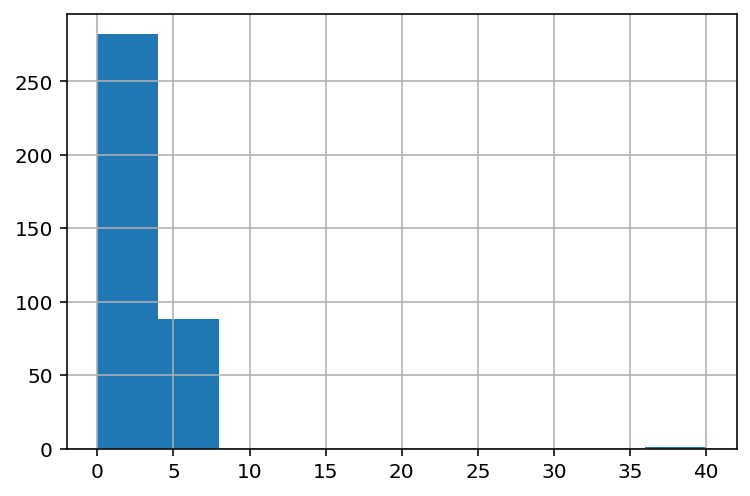

In [290]:
df_stud.fedu.hist()

The histogram tells us that the most observations are in the range of 0 to 4 and values above 4 are outliers according to the data set descrition. I'm going to assing the outliers to NaN values, because in this case it doesn't make sense to use IQR for filtering outliers.

In [291]:
df_stud.loc[df_stud.fedu > 4] = None
df_stud.fedu.max()

4.0

The "famrel" column has strange min value (-1), might be there is a mistake. 

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16.0,U,GT3,NaN,2.0,2.0,services,services,...,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


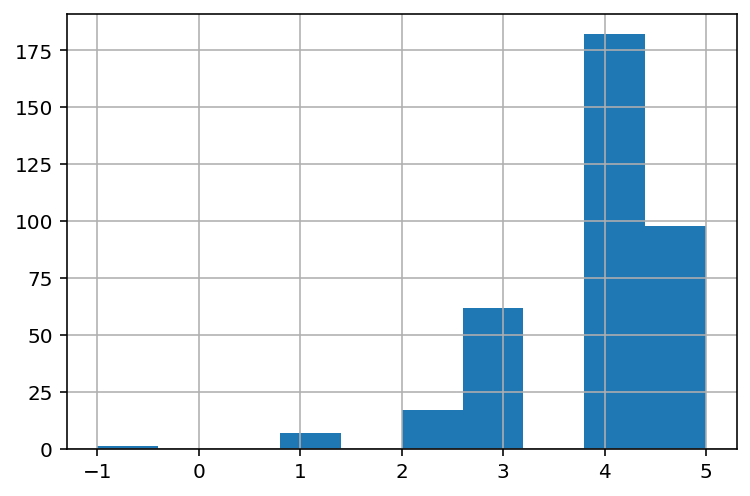

In [292]:
df_stud.famrel.hist()
df_stud.loc[df_stud.famrel < 1]

In [293]:
df_stud.loc[df_stud.famrel < 1] = None

The maximum of 'Absences' is quite large (max=385) than other values. As I'm not sure if it is an outlier or not, I will leave the value as it is. It can happen that one student wasn't at school the whole year, although 385 is larger than 365 days in a year, there is no information about the data sampling duration, so might be it was longer than one academic year. 

### 3. Unique values for categorical data

In [294]:
df_stud.describe(include=["object"])

,school,sex,address,famsize,pstatus,mjob,fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,393,393,376,366,350,374,357,376,362,384,354,353,379,377,373,359,362
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,347,206,293,259,314,133,196,137,249,333,217,199,194,299,354,303,238


The table above includes unique category for each column, these unique values seem to be right when compare to the given data description.

### 4. Correlations

In [295]:
correlations = df_stud.corr()

In [296]:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.00,-0.17,-0.16,0.09,-0.01,0.23,0.01,0.07,0.02,0.13,-0.06,0.09,-0.16
medu,-0.17,1.00,0.63,-0.17,0.08,-0.24,-0.08,-0.02,0.02,0.06,-0.04,-0.01,0.21
fedu,-0.16,0.63,1.00,-0.16,0.01,-0.27,-0.01,-0.04,-0.02,0.05,0.02,0.02,0.13
traveltime,0.09,-0.17,-0.16,1.00,-0.11,0.07,0.11,-0.04,-0.02,0.04,-0.02,-0.05,-0.07
studytime,-0.01,0.08,0.01,-0.11,1.00,-0.17,-1.00,0.03,-0.12,-0.05,-0.08,-0.03,0.11
failures,0.23,-0.24,-0.27,0.07,-0.17,1.00,0.17,0.01,0.11,0.13,0.08,0.06,-0.34
studytime_granular,0.01,-0.08,-0.01,0.11,-1.00,0.17,1.00,-0.03,0.12,0.05,0.08,0.03,-0.11
famrel,0.07,-0.02,-0.04,-0.04,0.03,0.01,-0.03,1.00,0.17,0.07,0.10,-0.08,0.05
freetime,0.02,0.02,-0.02,-0.02,-0.12,0.11,0.12,0.17,1.00,0.29,0.07,0.01,0.02
goout,0.13,0.06,0.05,0.04,-0.05,0.13,0.05,0.07,0.29,1.00,-0.01,-0.05,-0.13


- High positive correlation between 'medu' and 'fedu'
- Negative correlation between 'score' and 'failures' might be interpreted as: the more failures are, the lower score is
- There is low linear correlation between our parameter 'score' and 'traveltime', 'famrel', 'freetime', 'health' and 'absences'
- Correlation matrix suggests that there is (perfect) strong negative correlation between 'studytime' and 'studytime_granular', so we can just drop one of the columns


<AxesSubplot:xlabel='studytime', ylabel='studytime_granular'>

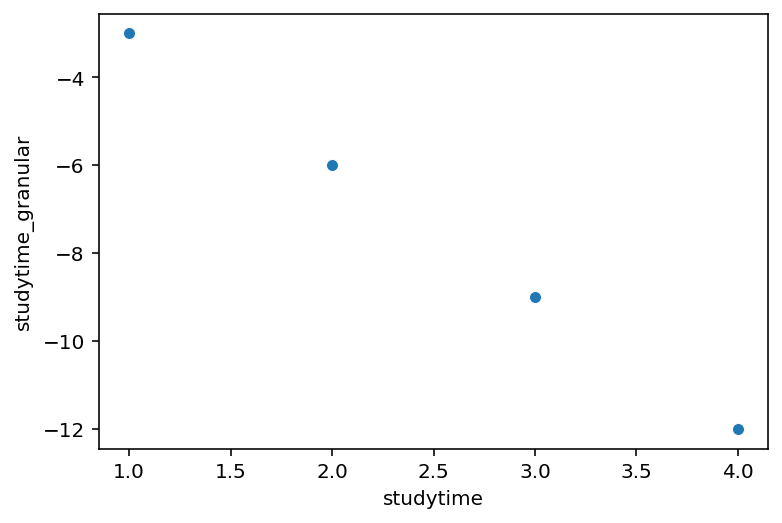

In [297]:
sns.scatterplot(x="studytime", y="studytime_granular", data=df_stud)

### 5. Analysis of nominal (categorical) variables

 - Let's create box-plots separately for those columns that have 'yes-no' data

In [298]:
df_yn = df_stud[['score', 'schoolsup', 'famsup', 'paid',
                 'activities', 'nursery', 'higher', 'internet', 'romantic']]
df_yn.head()

,score,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,30.0,yes,no,no,no,yes,yes,NaN,no
1,30.0,no,yes,no,no,no,yes,yes,no
2,50.0,yes,no,NaN,no,yes,yes,yes,NaN
3,75.0,no,yes,yes,yes,yes,yes,yes,yes
4,50.0,no,yes,yes,no,yes,yes,no,no


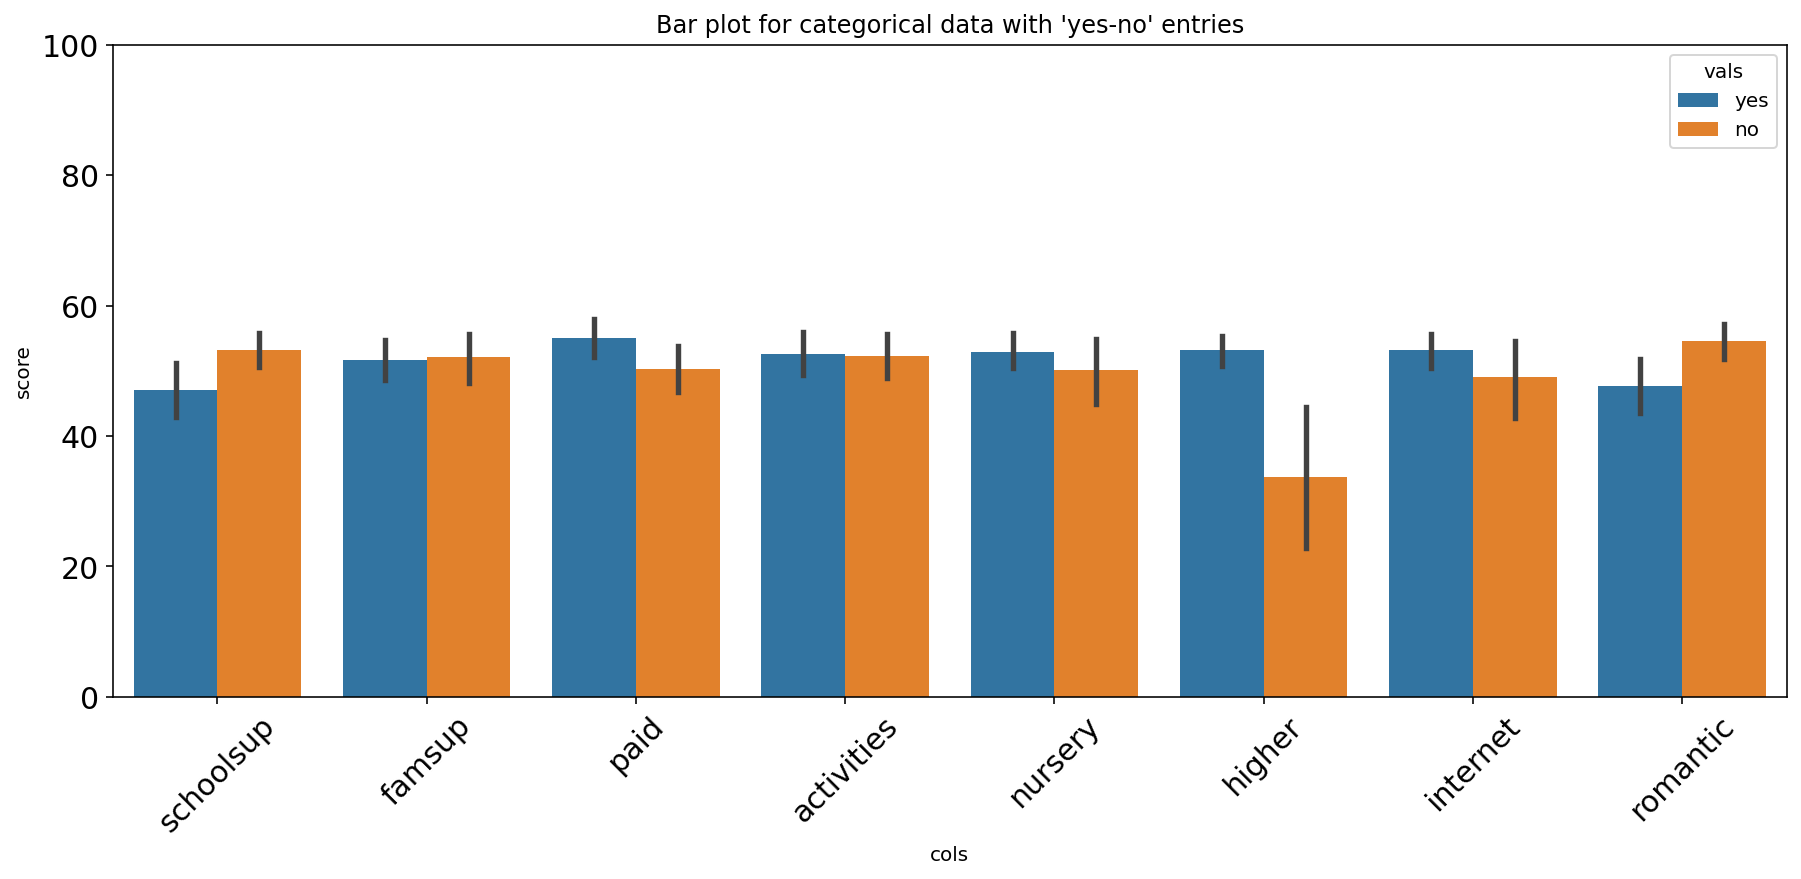

In [299]:
df_yn_melt = df_yn.melt('score', var_name='cols', value_name='vals')

get_barplot('score', df_yn_melt,
            "Bar plot for categorical data with 'yes-no' entries")

The bar plot suggests:
1. Score of the students with (positive) School Support is lower than score of the students without support
2. Almost no difference in score between students that receive or not a family support
3. Students that attend additional paid lessons have better grade in Math
4. Little deviation between students with or without activities
5. Score of the students that attended nursery is slightly higher compared to the opposite group
6. Relatively significant difference in the 'higher' column suggests that students that are willing to get higher education have better grades in Math
7. Pupils that don't an internet connection at home have usually worse score
8. Students that are not disturbed by the (romantic) relationships study better

 - Statistics will help us better understand the data and extract right summary out of it, thus, let's test this group 

In [300]:
for col_yn in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col_yn)

- The rest of the categorical data type is analysed by the use of box plots:

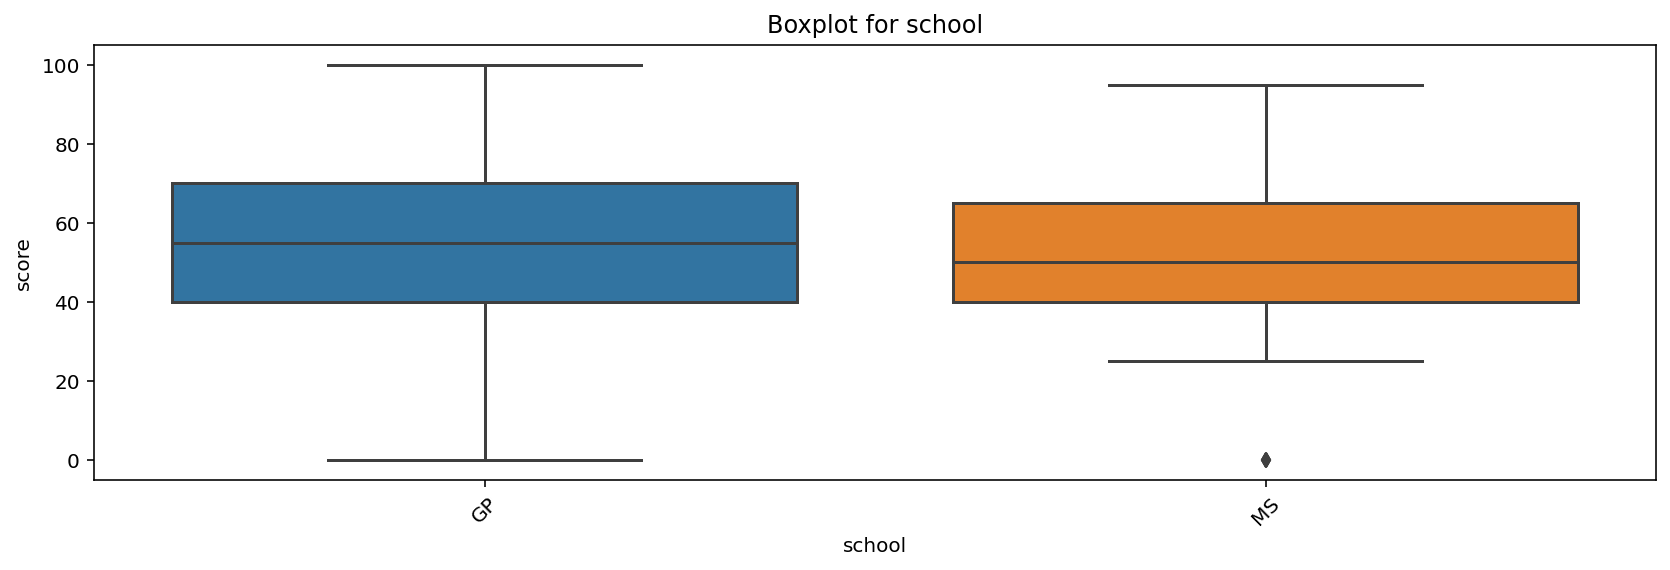

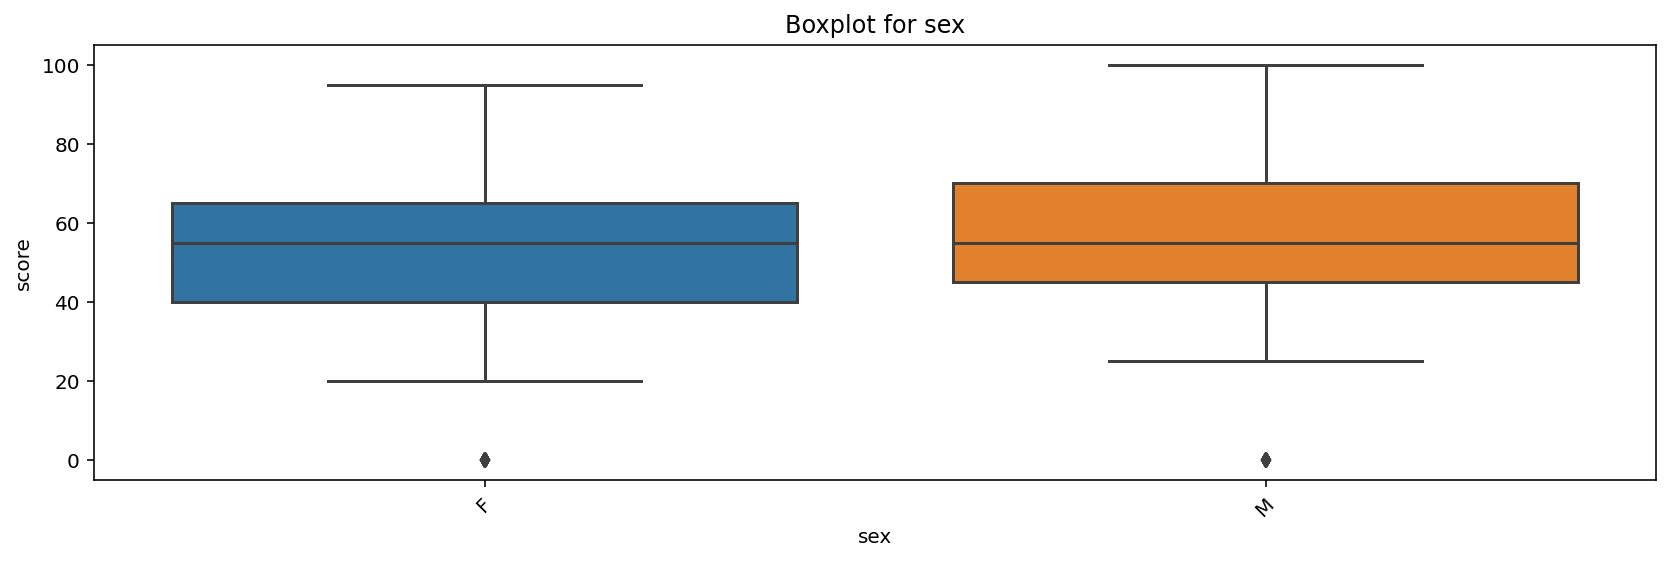

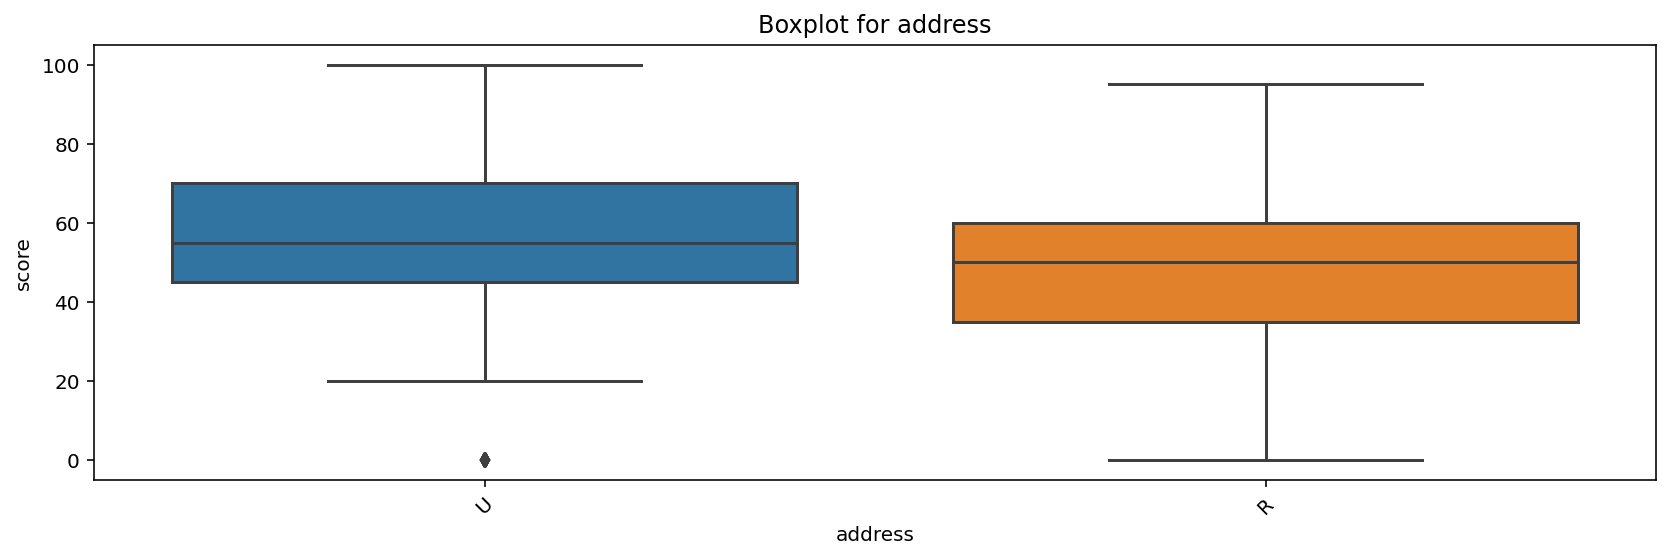

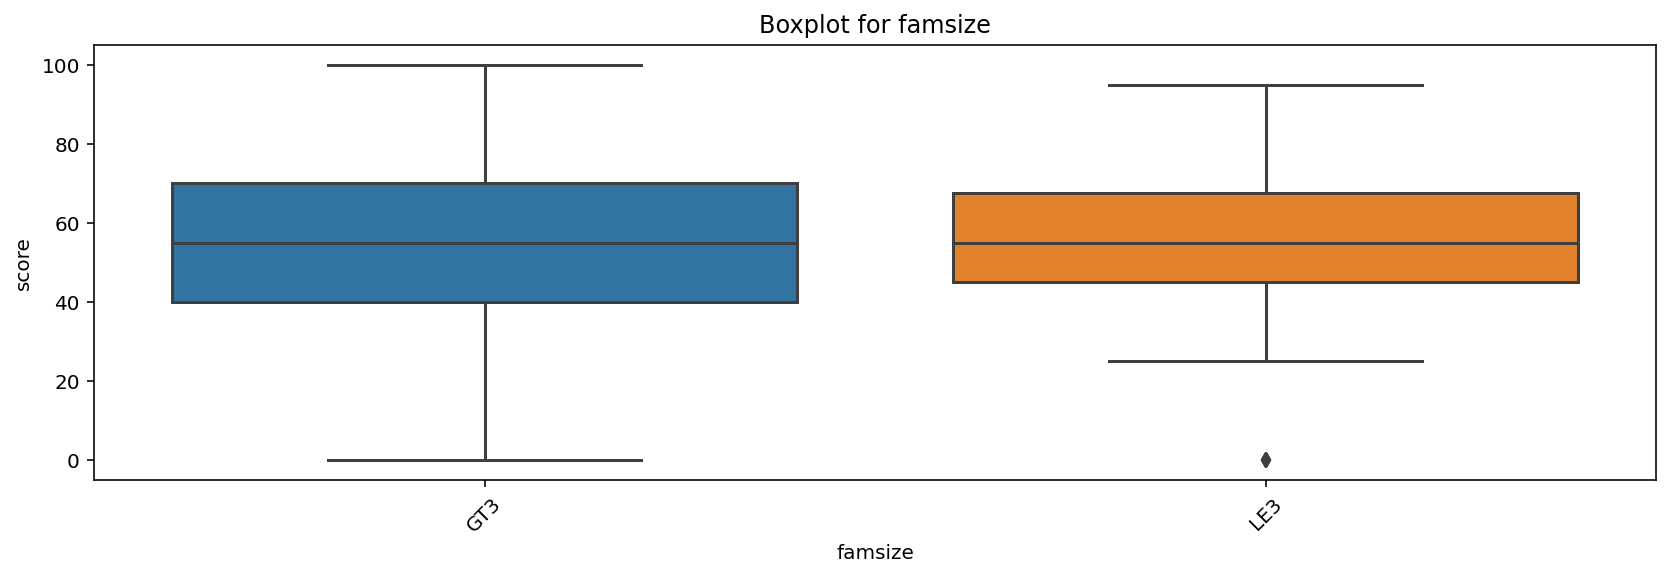

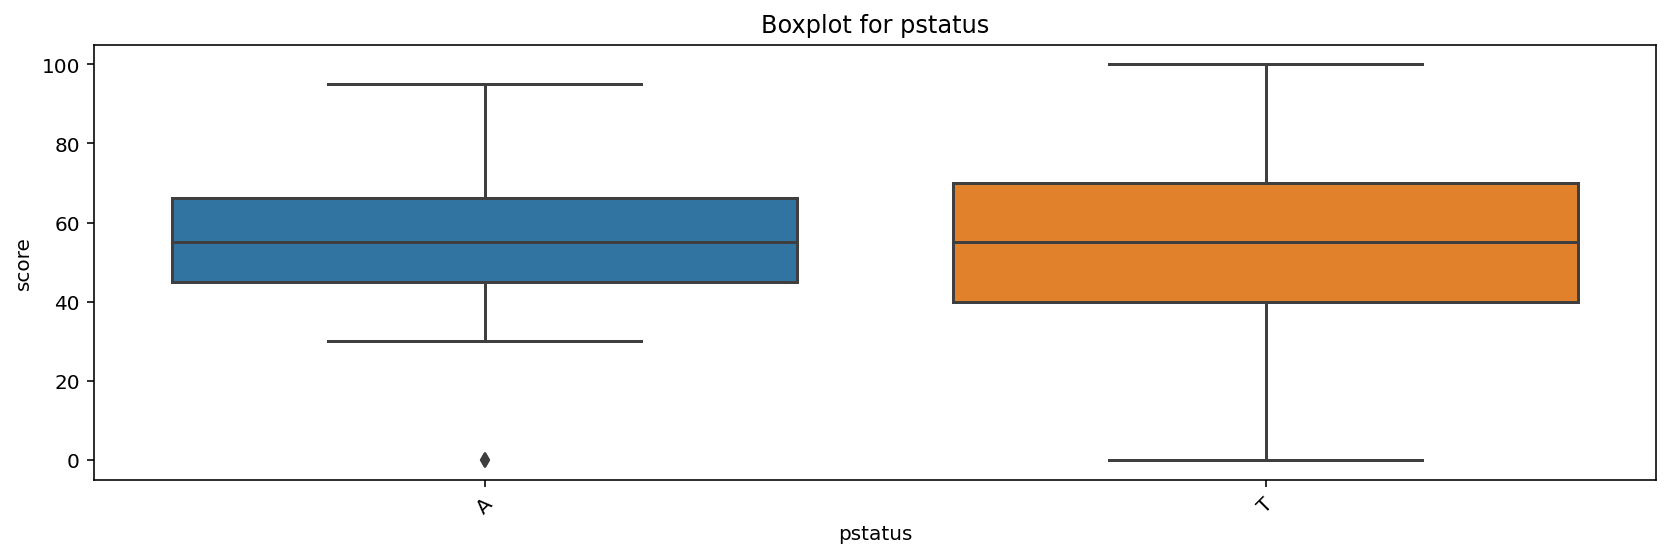

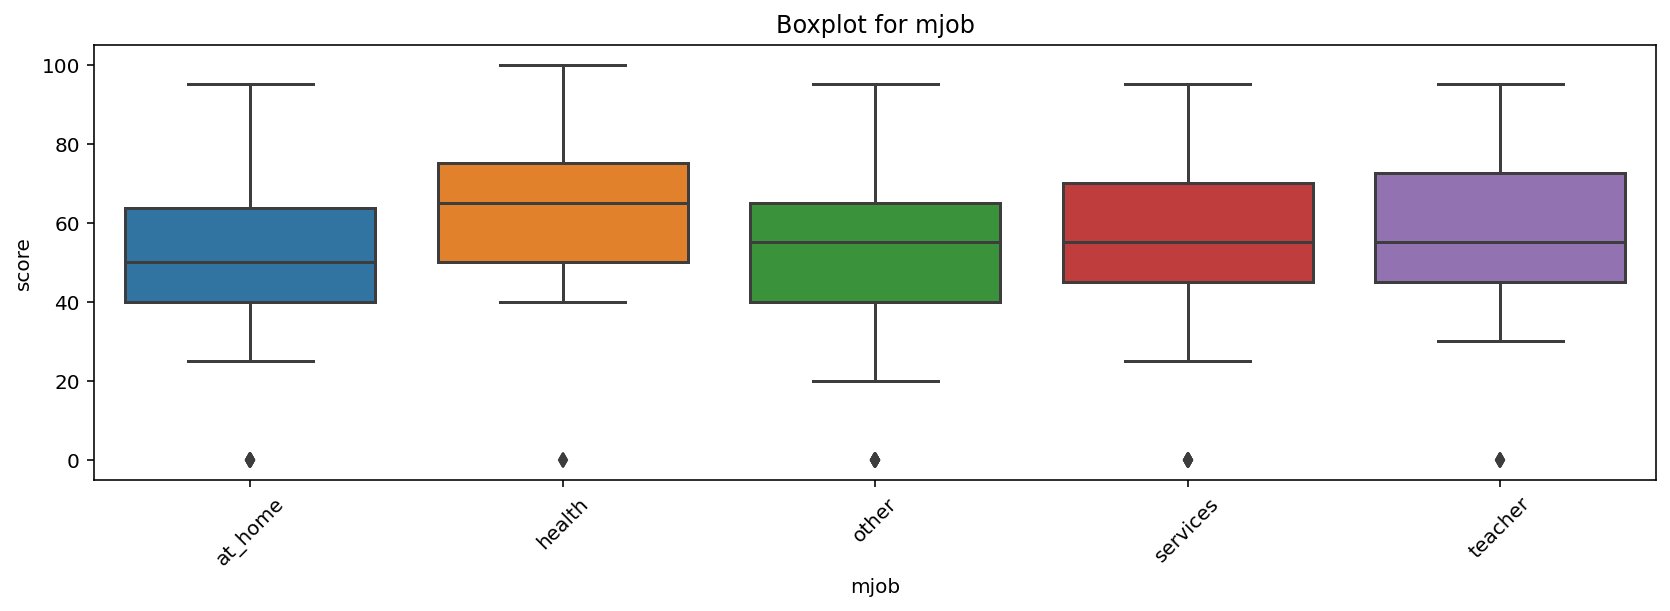

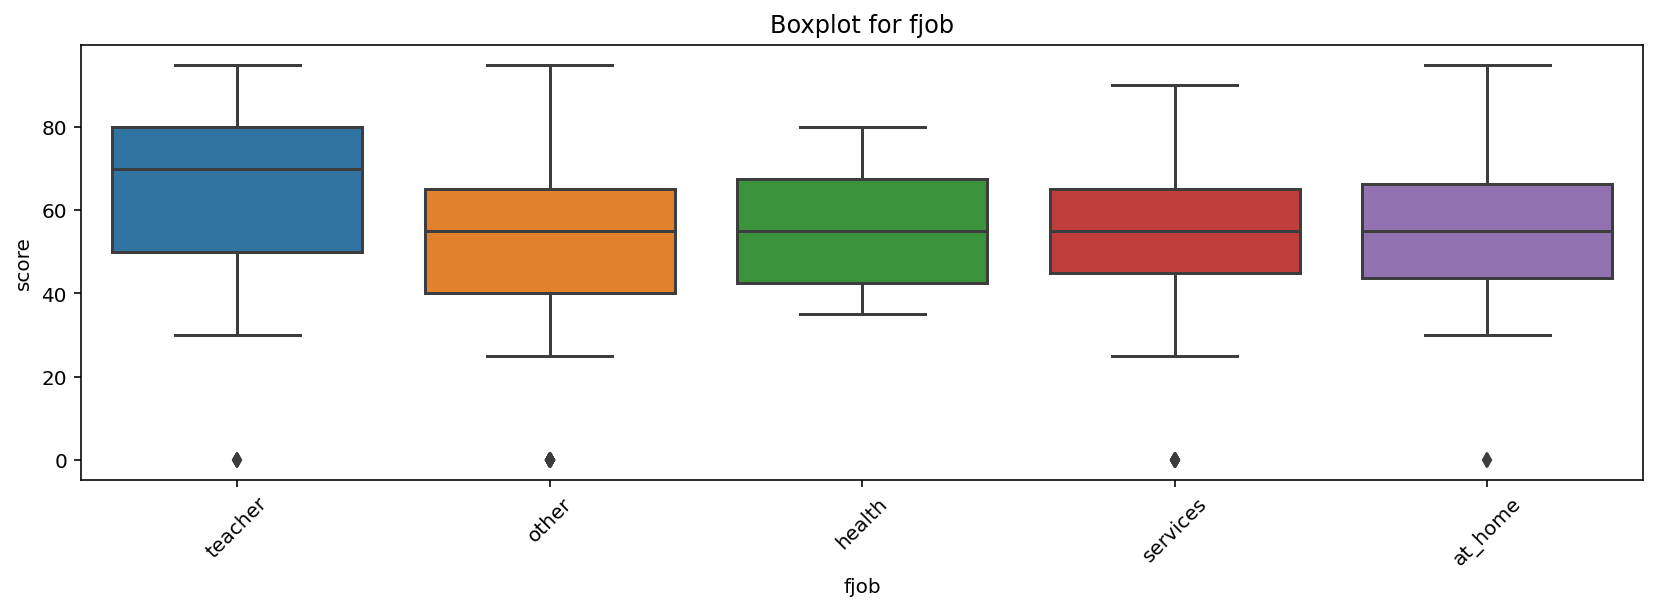

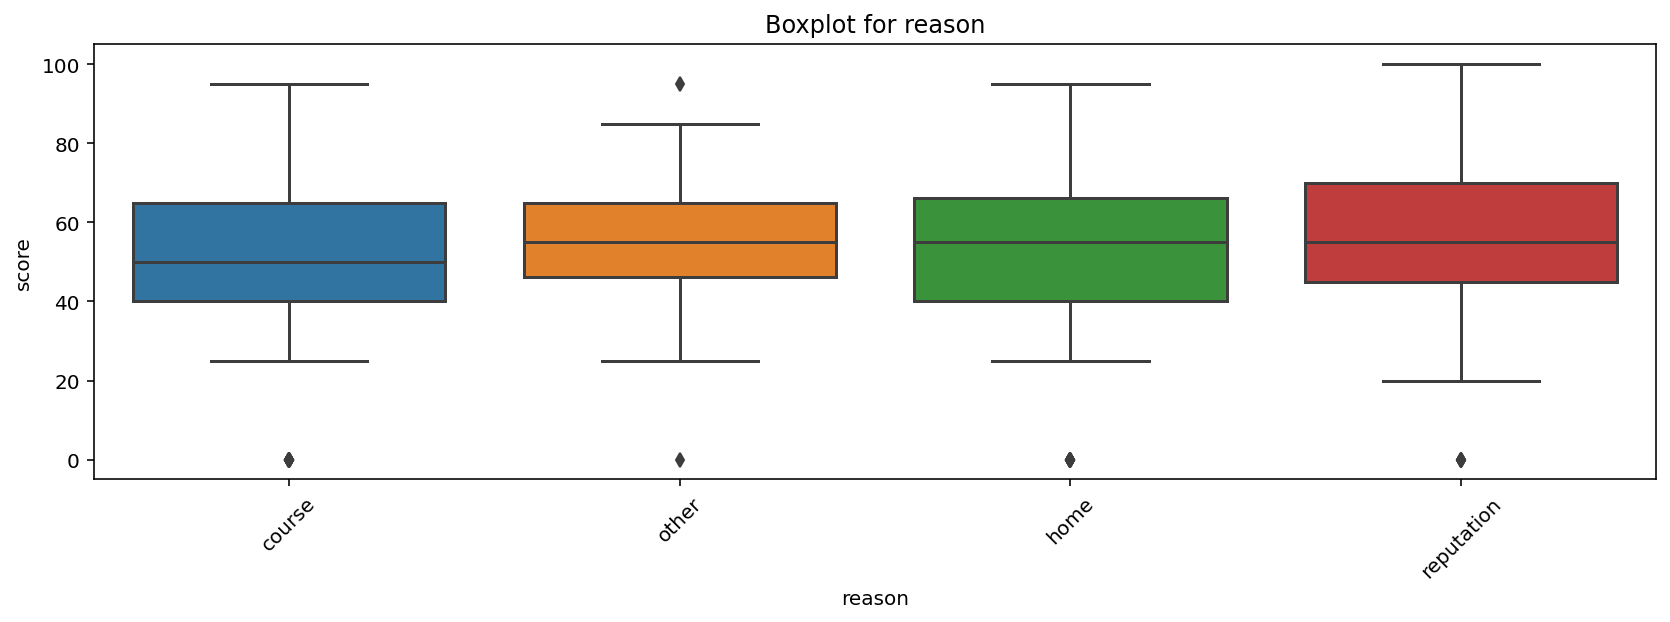

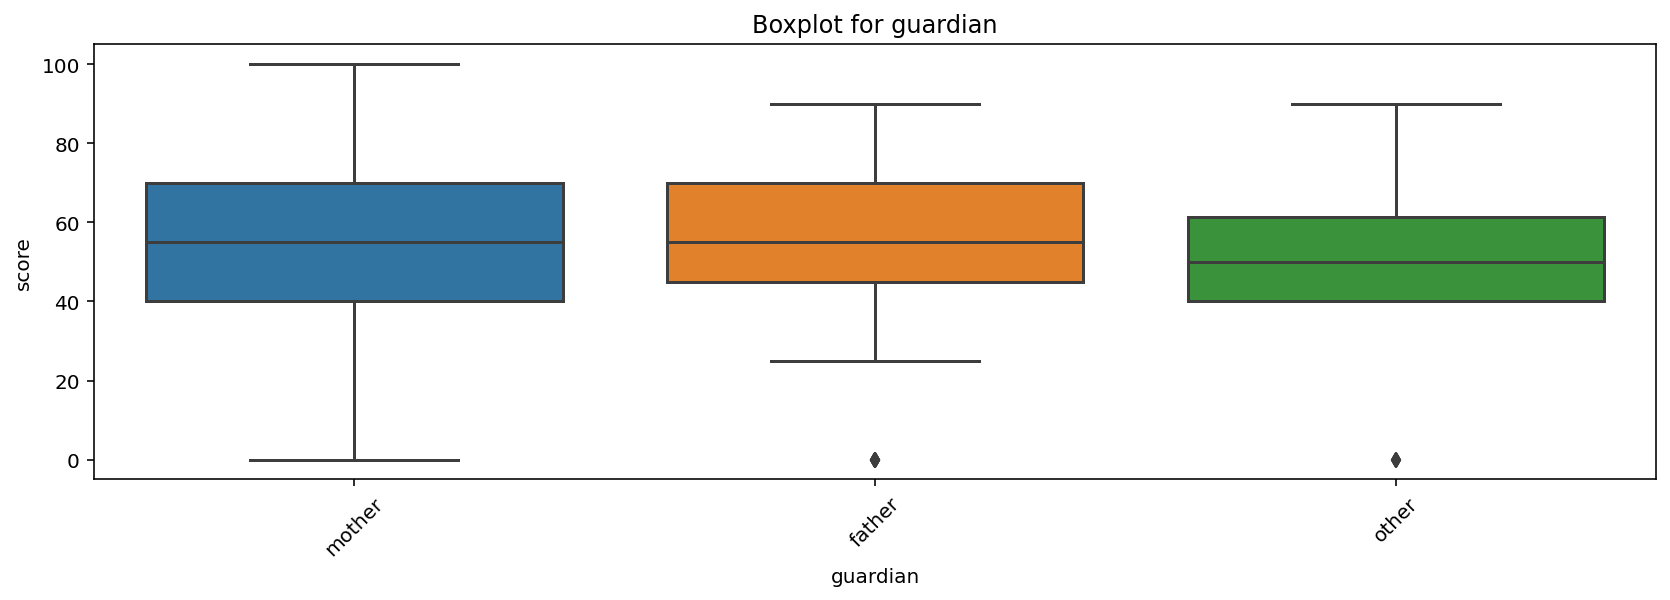

In [301]:
cols_cat = ['school', 'sex', 'address', 'famsize',
            'pstatus', 'mjob', 'fjob', 'reason', 'guardian']
for col in cols_cat:
    get_boxplot(col)

The box-plots show that almost all the parameters, except 'pstatus' and 'famsize', can affect the score of a student

 - In order to extract meaningful summary out of data, let's perform a t-test. We can test data as the samples are independent from each other and sample number is relatively high (more than 30)

In [302]:
for col in cols_cat:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob


### Summary

In [303]:
percent_missing = df_stud.isnull().sum() * 100 / len(df_stud)
print('1. Mean of missing value percentage of all data is ' + str(round(percent_missing.mean(), 2)
                                                                  ) + '. \n  The columns pstatus, famsup and paid have the maximum of None values (~10%)')

1. Mean of missing value percentage of all data is 5.26. 
  The columns pstatus, famsup and paid have the maximum of None values (~10%)


2. Parameters such as 'mjob', 'failures', 'higher', 'romantic' are the most important for the future data modelling and analysis